# Task B: 2-variable regression - using FANNs to fit data drawn from a bell curve.

## (a)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

Text(0.5, 0, 'x2')

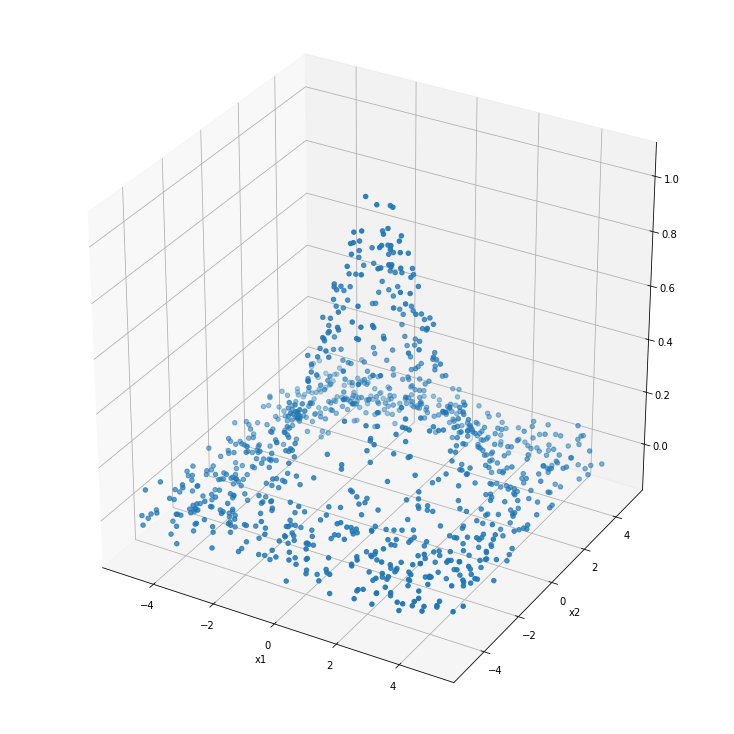

In [ ]:
N = 1000 # Nr of data-points to sample and generate
x = 10 * torch.rand(size = [N, 2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
    y[i] = torch.exp(-((x[i, :] - mean_true).T@(x[i, :] - mean_true)) / 4) + 0.04 * torch.randn(1)

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

## (c)

Architecture I: 2-10-1 with ReLU activation for all hidden neurons

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
my_dataset = TensorDataset(x, y) # create your dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size = 25, shuffle = True) # create your dataloader

# Defining the single neuron having 2 inputs
model_1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_1.parameters(), lr = 0.005)

training_minibatch_Js = []
nr_epochs = 800
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_1(x_batch) # Make predection on batch
        
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

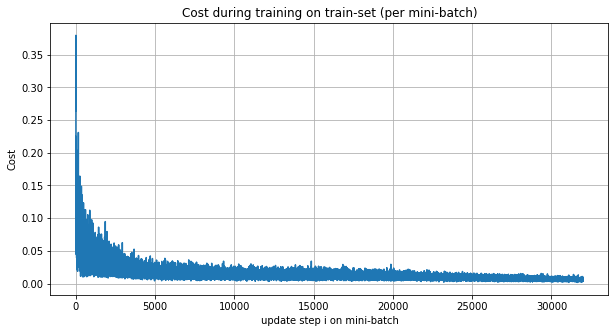

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize = [10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("The final cost is {: .3}.".format(training_minibatch_Js[-1].item()))

The final cost is  0.00845.


In [ ]:
x1 = torch.linspace(start = -5, end = 5, steps = 100)
x2 = torch.linspace(start = -5, end = 5, steps = 100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T

In [ ]:
with torch.no_grad():
    y_preds = model_1(s) # making predictions on surface grid to get surface values.

Text(0.5, 0, 'x2')

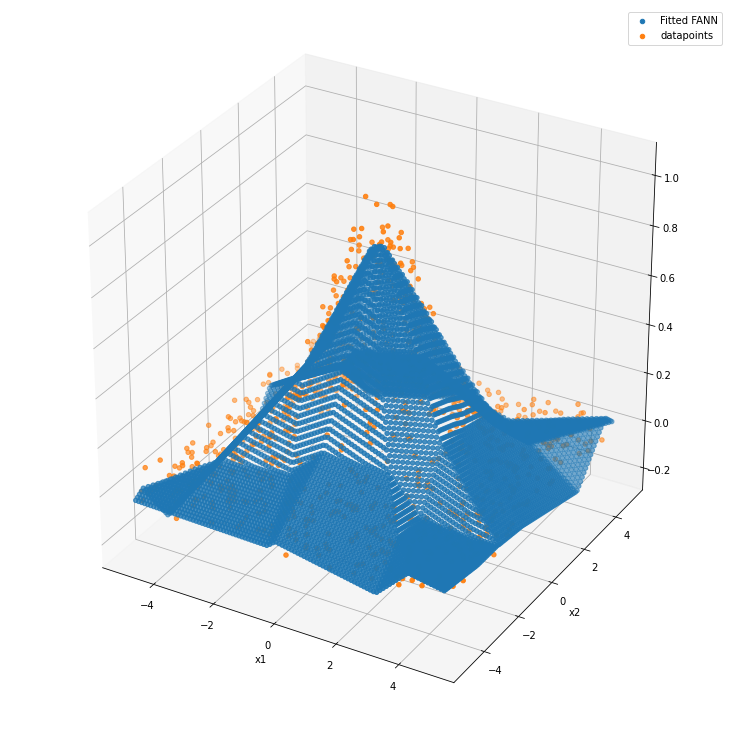

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Architecture II: 2-50-1 with ReLU activation for all hidden neurons

In [ ]:
my_dataset = TensorDataset(x, y) # create your dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size = 25, shuffle = True) # create your dataloader

# Defining the single neuron having 2 inputs
model_2 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 50),
    nn.ReLU(),
    nn.Linear(in_features = 50, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_2.parameters(), lr = 0.005)

In [ ]:
training_minibatch_Js = []
nr_epochs = 500
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_2(x_batch) # Make predection on batch
        
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

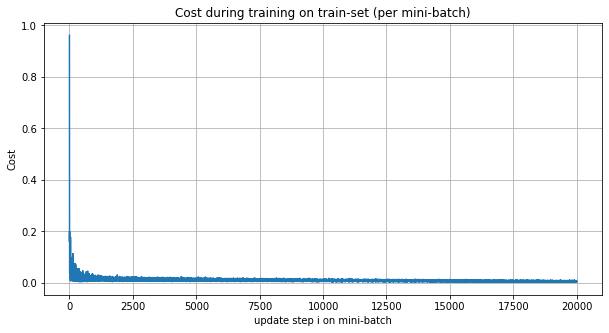

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("The final cost is {: .3}.".format(training_minibatch_Js[-1].item()))

The final cost is  0.00626.


In [ ]:
with torch.no_grad():
    y_preds = model_2(s) # making predictions on surface grid to get surface values.

Text(0.5, 0, 'x2')

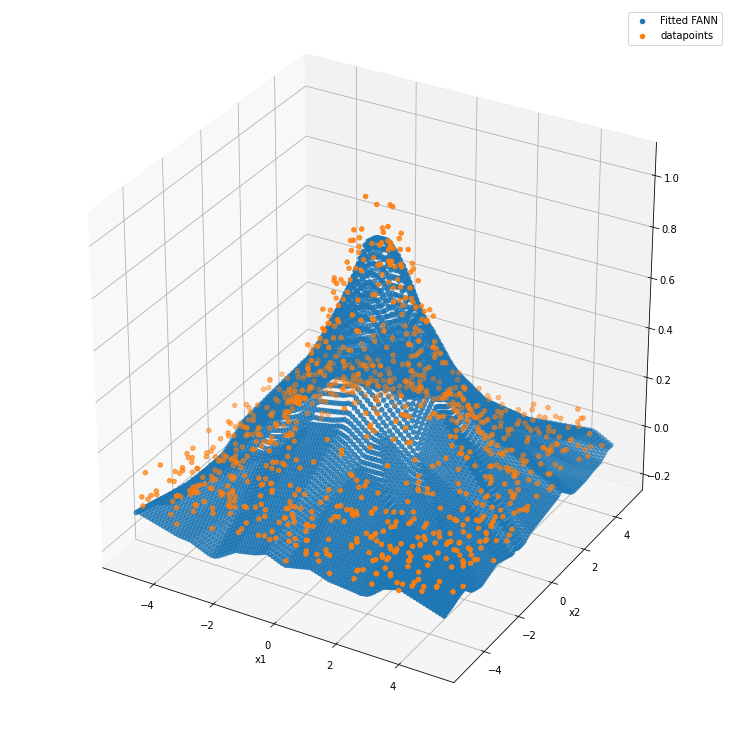

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Architecture III: 2-300-1 with ReLU activation for all hidden neurons

In [ ]:
my_dataset = TensorDataset(x, y) # create your dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size = 100, shuffle = True) # create your dataloader

# Defining the single neuron having 2 inputs
model_3 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 300),
    nn.ReLU(),
    nn.Linear(in_features = 300, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_3.parameters(), lr = 0.001)

training_minibatch_Js = []
nr_epochs = 500
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_3(x_batch) # Make predection on batch
        
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

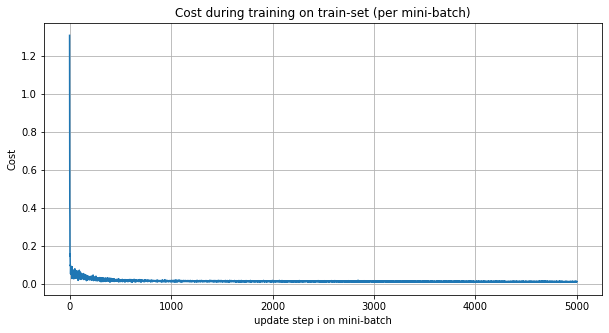

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize=[10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("The final cost is {: .3}.".format(training_minibatch_Js[-1].item()))

The final cost is  0.00994.


In [ ]:
x1 = torch.linspace(start = -5, end = 5, steps = 100)
x2 = torch.linspace(start = -5, end = 5, steps = 100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T

In [ ]:
with torch.no_grad():
    y_preds = model_3(s) # making predictions on surface grid to get surface values.

Text(0.5, 0, 'x2')

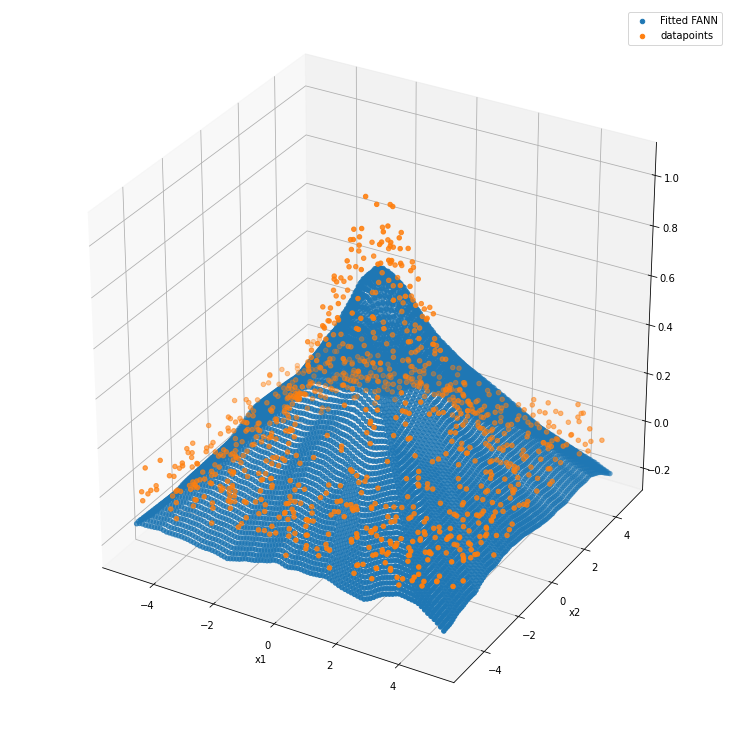

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Architecture IV: 2-100-20-5-1 with ReLU activation for all hidden neurons

In [ ]:
my_dataset = TensorDataset(x, y) # create your dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size = 25, shuffle = True) # create your dataloader

# Defining the single neuron having 2 inputs
model_4 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 100),
    nn.ReLU(),
    nn.Linear(in_features = 100, out_features = 20),
    nn.ReLU(),
    nn.Linear(in_features = 20, out_features = 5),
    nn.ReLU(),
    nn.Linear(in_features = 5, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_4.parameters(), lr = 0.005)


In [ ]:
training_minibatch_Js = []
nr_epochs = 500
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_4(x_batch) # Make predection on batch
        
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params


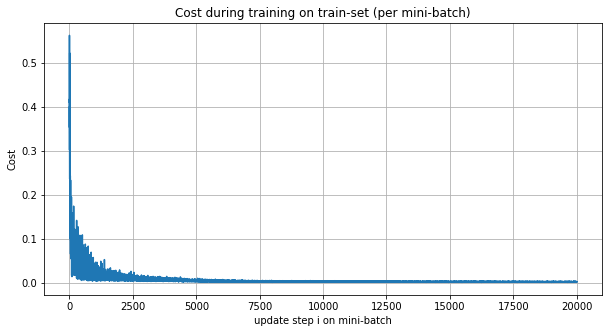

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()


In [ ]:
print("The final cost is {: .3}.".format(training_minibatch_Js[-1].item()))

The final cost is  0.00227.


In [ ]:
with torch.no_grad():
    y_preds = model_4(s) # making predictions on surface grid to get surface values.

Text(0.5, 0, 'x2')

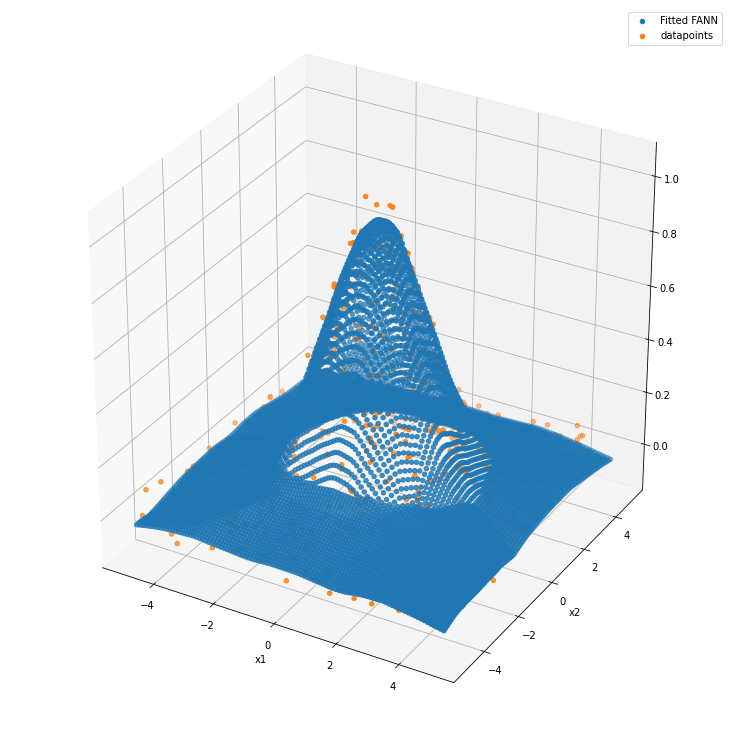

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Architecture V: 2-300-100-20-1 with ReLU activation for all hidden neurons

In [ ]:
my_dataset = TensorDataset(x, y) # create your dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size = 25, shuffle = True) # create your dataloader

# Defining the single neuron having 2 inputs
model_5 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 300),
    nn.ReLU(),
    nn.Linear(in_features = 300, out_features = 100),
    nn.ReLU(),
    nn.Linear(in_features = 100, out_features = 20),
    nn.ReLU(),
    nn.Linear(in_features = 20, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_5.parameters(), lr = 0.001)

In [ ]:
training_minibatch_Js = []
nr_epochs = 500
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_5(x_batch) # Make predection on batch
        
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params


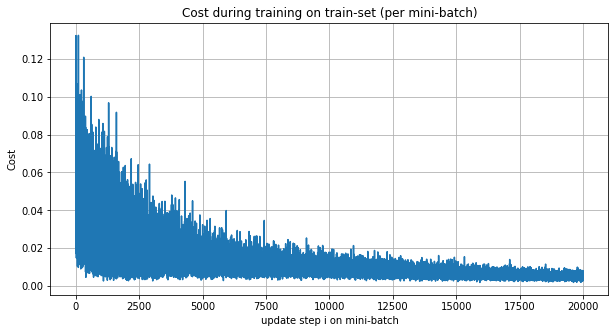

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()


In [ ]:
print("The final cost is {: .3}.".format(training_minibatch_Js[-1].item()))

The final cost is  0.0047.


In [ ]:
with torch.no_grad():
    y_preds = model_5(s) # making predictions on surface grid to get surface values.

Text(0.5, 0, 'x2')

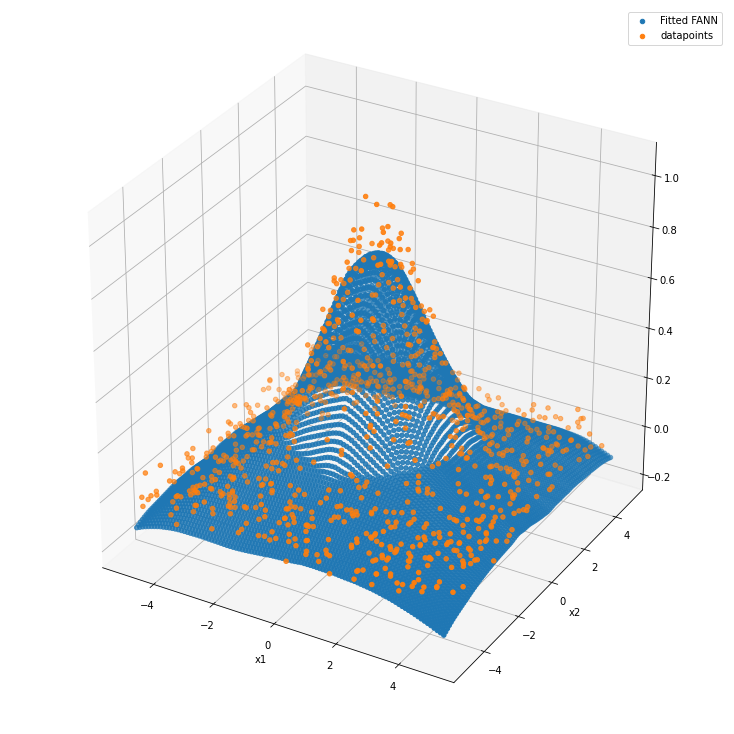

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x[:,0], x[:,1], y, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

(f) Compute the cost (mean squared error) for each trained model for a separate test set

In [ ]:
# Create 10000 test examples

M = 10000 # Nr of test examples
x_test = 10 * torch.rand(size = [M, 2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y_test = torch.zeros(M).reshape(-1,1)
for i in range(len(x_test)):
    y_test[i] = torch.exp(-((x_test[i, :] - mean_true).T@(x_test[i, :] - mean_true)) / 4) + 0.04 * torch.randn(1)

In [ ]:
# Architecture 1
with torch.no_grad():
    y_preds_1 = model_1(x_test)

cost_function = nn.MSELoss()
cost_1 = cost_function(y_preds_1, y_test)

print("The MSE of Architecture 1 is {: .3}.".format(cost_1.item()))

The MSE of Architecture 1 is  0.00616.


In [ ]:
# Architecture 2
with torch.no_grad():
    y_preds_2 = model_2(x_test)

cost_function = nn.MSELoss()
cost_2 = cost_function(y_preds_2, y_test)

print("The MSE of Architecture 2 is {: .3}.".format(cost_2.item()))

The MSE of Architecture 2 is  0.00596.


In [ ]:
# Architecture 3
with torch.no_grad():
    y_preds_3 = model_3(x_test)

cost_function = nn.MSELoss()
cost_3 = cost_function(y_preds_1, y_test)

print("The MSE of Architecture 3 is {: .3}.".format(cost_3.item()))

The MSE of Architecture 3 is  0.00616.


In [ ]:
# Architecture 4
with torch.no_grad():
    y_preds_4 = model_4(x_test)

cost_function = nn.MSELoss()
cost_4 = cost_function(y_preds_4, y_test)

print("The MSE of Architecture 4 is {: .3}.".format(cost_4.item()))

The MSE of Architecture 4 is  0.00201.


In [ ]:
# Architecture 5
with torch.no_grad():
    y_preds_5 = model_5(x_test)

cost_function = nn.MSELoss()
cost_5 = cost_function(y_preds_5, y_test)

print("The MSE of Architecture 5 is {: .3}.".format(cost_5.item()))

The MSE of Architecture 5 is  0.00512.


(g)

In [ ]:
# 50 data points
N = 50 # Nr of data-points to sample and generate
x_train = 10 * torch.rand(size = [N, 2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y_train = torch.zeros(N).reshape(-1, 1)
for i in range(len(x_train)):
    y_train[i] = torch.exp(-((x_train[i, :] - mean_true).T@(x_train[i, :] - mean_true)) / 4) + 0.04 * torch.randn(1)

my_dataset = TensorDataset(x, y)

In [ ]:
# Train both of the above two network on a synthetic dataset which contains 50 data points.
my_dataloader = DataLoader(my_dataset, batch_size = 3, shuffle = True)

# Architecture I: 2-10-1 with ReLU activation for all hidden neurons
model_1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 10),
    nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_1.parameters(), lr = 0.01)

training_minibatch_Js = []
nr_epochs = 100
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_1(x_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

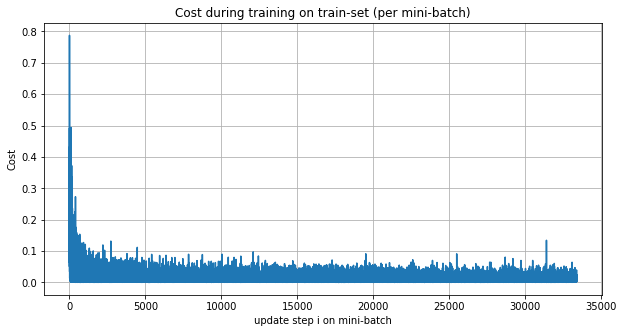

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize=[10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("The final cost of Architecture I is {: .3}.".format(training_minibatch_Js[-1]))

The final cost of Architecture I is  0.00342.


Text(0.5, 0, 'x2')

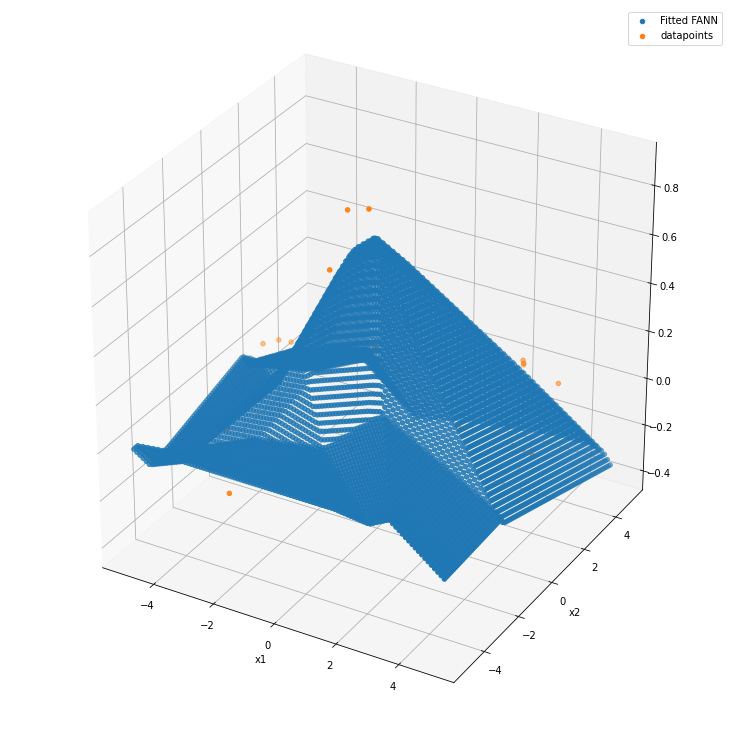

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = torch.linspace(start = -5, end = 5, steps = 100)
x2 = torch.linspace(start = -5, end = 5, steps = 100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T

# Prediction
with torch.no_grad():
    y_preds = model_1(s) # making predictions on surface grid to get surface values

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x_train[:,0], x_train[:,1], y_train, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [ ]:
# Testset of size M = 10000 data points

M = 10000 # Nr of data-points for test
x_test = 10 * torch.rand(size = [M, 2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y_test = torch.zeros(M).reshape(-1, 1)
for i in range(len(x_test)):
    y_test[i] = torch.exp(-((x_test[i, :] - mean_true).T@(x_test[i, :] - mean_true)) / 4) + 0.04 * torch.randn(1)

# Prediction
with torch.no_grad():
    y_preds = model_1(x_test) # The test dataset

cost = cost_function(y_preds, y_test)
print(cost.item())

0.014631751924753189


In [ ]:
# Train both of the above two network on a synthetic dataset which contains 50 data points.
my_dataloader = DataLoader(my_dataset, batch_size = 5, shuffle = True)

# Architecture V: 2-300-100-20-1 with ReLU activation for all hidden neurons
model_5 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 300),
    nn.ReLU(),
    nn.Linear(in_features = 300, out_features = 100),
    nn.ReLU(),
    nn.Linear(in_features = 100, out_features = 20),
    nn.ReLU(),
    nn.Linear(in_features = 20, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss()

optim = torch.optim.SGD(model_5.parameters(), lr = 0.01)

training_minibatch_Js = []
nr_epochs = 200
for epoch_i in range(nr_epochs):
    for x_batch, y_batch in my_dataloader:
        y_preds = model_5(x_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

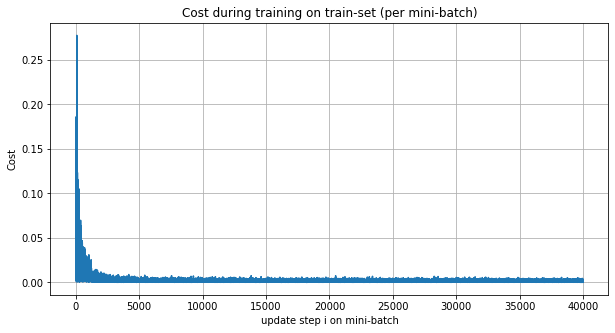

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize=[10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("The final cost of Architecture V is {: .3}.".format(training_minibatch_Js[-1]))

The final cost of Architecture V is  0.00154.


Text(0.5, 0, 'x2')

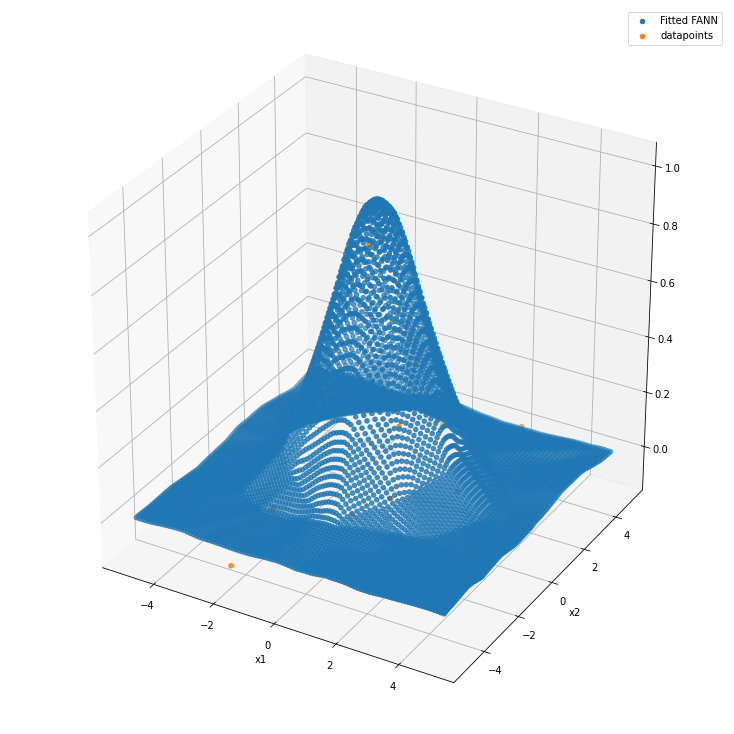

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = torch.linspace(start = -5, end = 5, steps = 100)
x2 = torch.linspace(start = -5, end = 5, steps = 100)
X, Y = torch.meshgrid(x1, x2)

s = torch.stack([X.ravel(), Y.ravel()]).T

# Prediction
with torch.no_grad():
    y_preds = model_5(s) # making predictions on surface grid to get surface values

# 3D surface plotting
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = Axes3D(fig)

ax.scatter(s[:,0], s[:,1], y_preds, label = 'Fitted FANN') #
ax.scatter(x_train[:,0], x_train[:,1], y_train, label = 'datapoints') # plotting data points
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [ ]:
# Testset of size M = 10000 data points

M = 10000 # Nr of data-points for test
x_test = 10 * torch.rand(size = [M, 2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y_test = torch.zeros(M).reshape(-1, 1)
for i in range(len(x_test)):
    y_test[i] = torch.exp(-((x_test[i, :] - mean_true).T@(x_test[i, :] - mean_true)) / 4) + 0.04 * torch.randn(1)

# Prediction
with torch.no_grad():
    y_preds = model_5(x_test) # The test dataset

cost = cost_function(y_preds, y_test)
print(cost.item())

0.0017588844057172537
